<a href="https://colab.research.google.com/github/bcaffo/ds4ph-bme/blob/master/notebooks/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
fix this link!

# Autoencoders

In this exercise, we'll build an autoencoder to model the cryptopunks. We'll assume that you've already looked at the chapter on convolutional networks, where we show how we downloaded and process the data. An autoencoder can be thought of as the following. Consider a datset with 8 features and consider a network that has 4 hidden nodes on the first layer, 2 on the second, 4 on the third and 8 on the fourth. See the picture below.

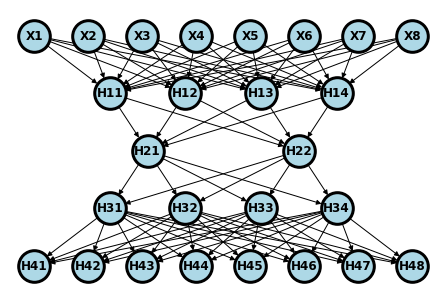

In [229]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("X1",  pos = (0, 5) )
G.add_node("X2",  pos = (1, 5) )
G.add_node("X3",  pos = (2, 5) )
G.add_node("X4",  pos = (3, 5) )
G.add_node("X5",  pos = (4, 5) )
G.add_node("X6",  pos = (5, 5) )
G.add_node("X7",  pos = (6, 5) )
G.add_node("X8",  pos = (7, 5) )

G.add_node("H11",  pos = (1.4, 4) )
G.add_node("H12",  pos = (2.8, 4) )
G.add_node("H13",  pos = (4.2, 4) )
G.add_node("H14",  pos = (5.6, 4) )

G.add_node("H21",  pos = (2.1, 3) )
G.add_node("H22",  pos = (4.9, 3) )

G.add_node("H31",  pos = (1.4, 2) )
G.add_node("H32",  pos = (2.8, 2) )
G.add_node("H33",  pos = (4.2, 2) )
G.add_node("H34",  pos = (5.6, 2) )


G.add_node("H41",  pos = (0, 1) )
G.add_node("H42",  pos = (1, 1) )
G.add_node("H43",  pos = (2, 1) )
G.add_node("H44",  pos = (3, 1) )
G.add_node("H45",  pos = (4, 1) )
G.add_node("H46",  pos = (5, 1) )
G.add_node("H47",  pos = (6, 1) )
G.add_node("H48",  pos = (7, 1) )

G.add_edges_from([ ("X1", "H11"),  ("X1", "H12"),  ("X1", "H13"),  ("X1", "H14")])
G.add_edges_from([ ("X2", "H11"),  ("X2", "H12"),  ("X2", "H13"),  ("X2", "H14")])
G.add_edges_from([ ("X3", "H11"),  ("X3", "H12"),  ("X3", "H13"),  ("X3", "H14")])
G.add_edges_from([ ("X4", "H11"),  ("X4", "H12"),  ("X4", "H13"),  ("X4", "H14")])
G.add_edges_from([ ("X5", "H11"),  ("X5", "H12"),  ("X5", "H13"),  ("X5", "H14")])
G.add_edges_from([ ("X6", "H11"),  ("X6", "H12"),  ("X6", "H13"),  ("X6", "H14")])
G.add_edges_from([ ("X7", "H11"),  ("X7", "H12"),  ("X7", "H13"),  ("X7", "H14")])
G.add_edges_from([ ("X8", "H11"),  ("X8", "H12"),  ("X8", "H13"),  ("X8", "H14")])

G.add_edges_from([ ("H11", "H21"),  ("H11", "H22")])
G.add_edges_from([ ("H12", "H21"),  ("H12", "H22")])
G.add_edges_from([ ("H13", "H21"),  ("H13", "H22")])
G.add_edges_from([ ("H14", "H21"),  ("H14", "H22")])


G.add_edges_from([ ("H21", "H31"),  ("H21", "H32"),  ("H21", "H33"),  ("H21", "H34")])
G.add_edges_from([ ("H22", "H31"),  ("H22", "H32"),  ("H22", "H33"),  ("H22", "H34")])

G.add_edges_from([ ("H31", "H41"),  ("H31", "H42"),  ("H31", "H43"),  ("H31", "H44")])
G.add_edges_from([ ("H31", "H45"),  ("H31", "H46"),  ("H31", "H47"),  ("H31", "H48")])
G.add_edges_from([ ("H32", "H41"),  ("H32", "H42"),  ("H32", "H43"),  ("H32", "H44")])
G.add_edges_from([ ("H32", "H45"),  ("H32", "H46"),  ("H32", "H47"),  ("H32", "H48")])
G.add_edges_from([ ("H33", "H41"),  ("H33", "H42"),  ("H33", "H43"),  ("H33", "H44")])
G.add_edges_from([ ("H33", "H45"),  ("H33", "H46"),  ("H33", "H47"),  ("H33", "H48")])
G.add_edges_from([ ("H34", "H41"),  ("H34", "H42"),  ("H34", "H43"),  ("H34", "H44")])
G.add_edges_from([ ("H34", "H45"),  ("H34", "H46"),  ("H34", "H47"),  ("H34", "H48")])


#G.add_edges_from([("H11", "H21"), ("H11", "H22"), ("H12", "H21"), ("H12", "H22")])
#G.add_edges_from([("H21", "Y"), ("H22", "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 1000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.5, 7.5])
ax.set_ylim([.5, 5.5])
plt.show()

Let $\phi$ be the first two layers of the network and $\theta$ be the last two. So, if we wanted to pass a data row, $x_i$ through the network we would do $\theta(\phi(x_i))$. We would call the network $\phi$ as the *encoding* network and $\theta$ as the decoding network. Consider training the network by minimizing

$$
\sum_{i=1}^n || x_i - \theta(\phi(x_i)) ||^2
$$

over the weights. This sort of network is called an autoencoder. Notice that the same data is the input and output of the network. This kind of learning is called **unsupervised**, since we're not trying to use $x$ to predict an outcome $y$. Instead, we're trying to explore variation and find interesting features in $x$ as a goal in itself without a "supervising" outcome, $y$, to help out.

Notice overfitting concerns are somewhat different in this network construction. If this model fits well, then it's suggesting that 2 numbers can explain 8. That is, the network will have reduced the inputs to only two dimensions, that we could visualize for example. That is a form of parsimony that prevents overfitting. The middle layer is called the embedding. It is called this because an autoencoder is a form of non-linear embedding of our data into a lower dimensionional space.

There's nothing to prevent us from having convolutional layers if the inputs are images. That's what we'll work on here. For convolutional autoencoders, it's typical to increase the number of channels and decrease the image sizes as one works through the network.

In [34]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms


Import the image of all of the cryptopunks where we'll try to fit a convolutional autoencoder. 

In [35]:
imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
imgArray = np.asarray(img)

Reorder the array. I couldn't get reshape to do this right, but I think this is a one-line command waiting to happen. See if you can figure out a better way. All images are 24x24x3 and there's 10,000 punks. (Supposedly, there will only ever be 10k punks.) Pytorch needs this in a 10,000x3x24x24 array.

In [65]:
finalArray = np.empty((10000, 3, 24, 24))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)  
    c, d = 24 * j, 24 * (j + 1) 
    idx = j + i * (100)
    finalArray[idx,0,:,:] = imgArray[a:b,c:d,0]
    finalArray[idx,1,:,:] = imgArray[a:b,c:d,1]
    finalArray[idx,2,:,:] = imgArray[a:b,c:d,2]

n = finalArray.shape[0]
trainFraction = .75
sample = np.random.uniform(size = n) < trainFraction
x_train = finalArray[ sample, :, :, :] / 255
x_test =  finalArray[~sample, :, :, :] / 255
print([x_train.shape, x_test.shape])


## To get the trainLoader to work, I had to just load in the torch tensor
## in the previous example we had both data and labels. This time we just 
## have data
trainLoader = torch.utils.data.DataLoader(torch.Tensor(x_train), batch_size = 100, shuffle = False, num_workers = 1)


Now let's create our encoder/decoder. Here we're going to use a simple approach for just flattening the images, one dense layer, they decoding. Network construction is its own thing in neural networks. The way we're doing our network is a *convolutional autoencoder*. Typically, these have the number of channels increase while the image size decreases in each convolutional layer. The middle layer is called the *embedding*. We have to get the dimensions to match up with a combination of kernels, pooling, and varying the stride length. 

Our network construction is as follows:

Channels: 3 -> 6 -> 12 -> 6 -> 3

Image dims: (24, 24) -> (20, 20) -> (10, 10) -> (6, 6) -> (3, 3) -> (6, 6) -> (10, 10) -> (24, 24)



In [130]:
kernel_size = 5
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 6, kernel_size)
        self.conv2 = nn.Conv2d(6, 12, kernel_size)
        self.pool  = nn.MaxPool2d(2, 2)
        self.iconv1 = nn.ConvTranspose2d(12, 6, kernel_size+1, stride = 2)
        self.iconv2 = nn.ConvTranspose2d(6, 3, kernel_size+1, stride = 2)

    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        return x
    
    def decode(self, x):
        x = F.relu(self.iconv1(x))
        ## Use the sigmoid as the final layer 
        ## since we've normalized pixel values to be between 0 and 1
        x = torch.sigmoid(self.iconv2(x))
        return(x)
    
    def forward(self, x):
        return self.decode(self.encode(x))
    
autoencoder = autoencoder()

Now we've constructed our network, let's try it out. I'm going to first do the encoder, then the decoder, then through the entire network. We'll check out the dimensions to make sure everything works.

In [131]:

## Here's some example data by grabbing one batch
tryItOut = iter(trainLoader).next()
print(tryItOut.shape)

## Let's encode that data
encoded = autoencoder.encode(tryItOut)
print(encoded.shape)

## Now let's decode the encoded data
decoded = autoencoder.decode(encoded)
print(decoded.shape)

## Now let's run the whole thing through
fedForward = autoencoder.forward(tryItOut)
print(fedForward.shape)


torch.Size([100, 3, 24, 24])
torch.Size([100, 12, 3, 3])
torch.Size([100, 3, 24, 24])
torch.Size([100, 3, 24, 24])


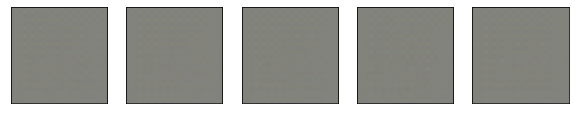

In [203]:
test = fedForward.detach().numpy()

## Plot out the first 5 images, note this isn't very interesting, since
## all of the weights haven't been trained
plt.figure(figsize=(10,5))
for i in range(5): 
  plt.subplot(1, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  img = np.transpose(test[i,:,:,:], (1, 2, 0))
  plt.imshow(img)





Let' see how we do on our images. We'll run the algorithm for 500 epochs 

In [ ]:
#Optimizer
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.001)

#Epochs
n_epochs = 500

autoencoder.train()


for epoch in range(n_epochs):
    for data in trainLoader:
        images = data
        optimizer.zero_grad()
        outputs = autoencoder.forward(images)
        loss = F.mse_loss(outputs, images)
        loss.backward()
        optimizer.step()
          


Now that we've run it, let's feed a collection of training images through the convnet and see how we did. The top row is the first 5 images of the last training epoch, last batch, and the bottom 5 is those images passed through the algorithm.

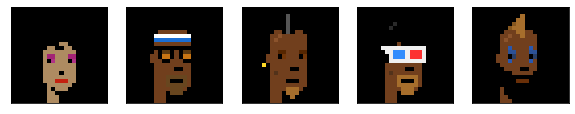

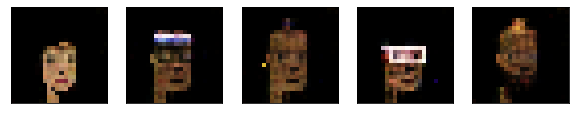

In [209]:
## the data from the last iteration is called images
trainSample = images.detach().numpy()

plt.figure(figsize=(10,5))
for i in range(5): 
  plt.subplot(1, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  img = np.transpose(trainSample[i,:,:,:], (1, 2, 0))
  plt.imshow(img)

## the output from the last iterations (feed forward through the network) is called outputs
trainOutput = outputs.detach().numpy()

plt.figure(figsize=(10,5))
for i in range(5): 
  plt.subplot(2, 5,i+6)
  plt.xticks([])
  plt.yticks([])
  img = np.transpose(trainOutput[i,:,:,:], (1, 2, 0))
  plt.imshow(img)


In [199]:
testLoader  = torch.utils.data.DataLoader(torch.Tensor(x_test), batch_size = 100, shuffle = False, num_workers = 1)
testSample = autoencoder.forward(iter(testLoader).next()).detach().numpy()

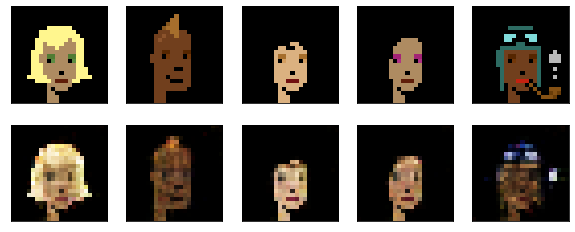

In [200]:
plt.figure(figsize=(10,4))

## Plot the original data
for i in range(5): 
  plt.subplot(2, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  img = np.transpose(x_test[i,:,:,:], (1, 2, 0))
  plt.imshow(img)
# Plot the data having been run throught the convolutional autoencoder
for i in range(5): 
  plt.subplot(2, 5, i + 6)
  plt.xticks([])
  plt.yticks([])
  img = np.transpose(testSample[i,:,:,:], (1, 2, 0))
  plt.imshow(img)

Not bad? One way to think about the convolutional autoencoder is as a compression algorithm.
The data starts out as 24x24x3 = 1,728 floats. In contrast, our middle layer is 12 x 12 x 3 = 432 
floats (25% of the original size). That is, it requires 75% fewer numbers to store the data as the 
embedding. You could imagine a sender having access to the encoder and the receiver having access to the decoder and then using the 75% reduction to send the data more efficiently.


